# Thông tin
1. **MSSV:** 22521586
2. **Họ Tên:** Trần Võ Lâm Trường
3. **Bài tập:** Bài tập 1
4. **Ngày thực hiện:** 26/3/2024  



# Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Đặt các đường dẫn cho bài tập

In [ ]:
# Khai báo đường dẫn đến môn học CS231.O21.2
import os
dir_monhoc = '/gdrive/My Drive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2'

# Khai báo đường dẫn đến bài tập
dir_baitap = os.path.join (dir_monhoc, 'Baitap', 'Baitap1')
dir_images = os.path.join(dir_baitap, 'images')

# Đọc và hiển thị ảnh

In [ ]:
# Khai báo sử dụng thư viện cv
import cv2 as cv

In [ ]:
# Đọc ảnh lena.jpg và chuyển thành ảnh xám
path_filename = os.path.join(dir_images, 'lena.jpg')
img = cv.imread(path_filename, 0) # 0: ảnh xám, 1: ảnh màu
img2 = cv.imread(path_filename, 1) # 0: ảnh xám, khác 0: ảnh màu

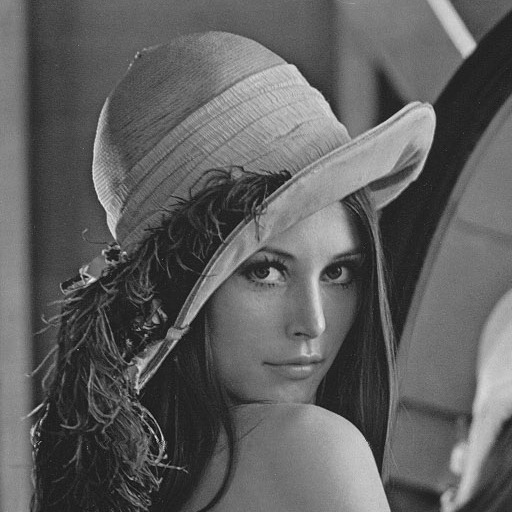

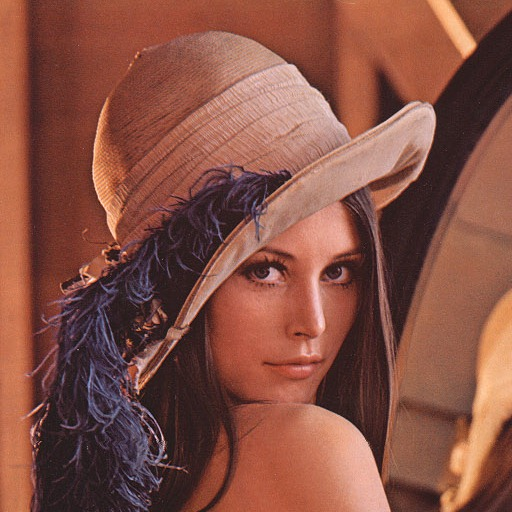

In [ ]:
# Hiển thị ảnh
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(img2)

# Tính và hiển thị histogram

In [ ]:
import numpy as np
hist = np.histogram(img.flatten(), 256, [0, 256])

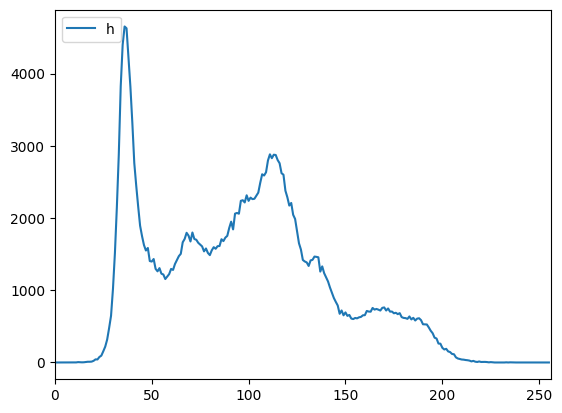

In [ ]:
hist = cv.calcHist([img],[0],None,[256],[0,256])

import matplotlib.pyplot as plt
plt.plot(hist)
plt.xlim([0,256])
plt.legend(('histogram'),loc = 'upper left')
plt.show()

# Yêu cầu 2

## Tính histogram cho ảnh

In [ ]:
def computeHistogram(pathfilename):
    img = cv.imread(pathfilename,0)
    hist = cv.calcHist([img],[0],None,
                       [256],[0,256])
    size = img.shape[0]*img.shape[1]
    hist = hist / size
    return hist

In [ ]:
def computeAllHistograms(ltrain, ltest, dir_train, dir_test ):
  train_hist = []
  test_hist = []
  for train in ltrain:
    train_path = os.path.join(dir_train, train)
    train_hist.append(computeHistogram(train_path))
  for test in ltest:
    test_path = os.path.join(dir_test, test)
    test_hist.append(computeHistogram(test_path))
  return train_hist, test_hist

In [ ]:
def compareImages(test_path, result_path):
    image1 = cv.imread(test_path)
    image2 = cv.imread(result_path)

    # Convert BGR to RGB (OpenCV reads images in BGR format)
    image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
    image2 = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

    # Display the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image1)
    axes[0].set_title('Image in test set')
    axes[0].axis('off')
    axes[1].imshow(image2)
    axes[1].set_title('Result image')
    axes[1].axis('off')
    plt.show()

In [ ]:
# Khai báo đường dẫn đến train và test
dir_train = os.path.join(dir_baitap, 'traffic_light_data', 'train')
dir_test = os.path.join(dir_baitap, 'traffic_light_data', 'test')

In [ ]:
ltrain = os.listdir('/gdrive/My Drive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2/Baitap/Baitap1/traffic_light_data/train')
ltest = os.listdir('/gdrive/My Drive/UIT/Semester 4/[CS231] Computer Vision/Assignment/CS231.O21.2/Baitap/Baitap1/traffic_light_data/test')

In [ ]:
train_hist, test_hist = computeAllHistograms(ltrain, ltest, dir_train, dir_test)
train_hist = np.squeeze(np.array(train_hist))
test_hist = np.squeeze(np.array(test_hist))

from scipy.spatial import distance
D_cos = distance.cdist(test_hist, train_hist, 'euclidean')
min_indexes_Euclidean = []
for each in D_cos:
  min_indexes_Euclidean.append(np.argmin(each))

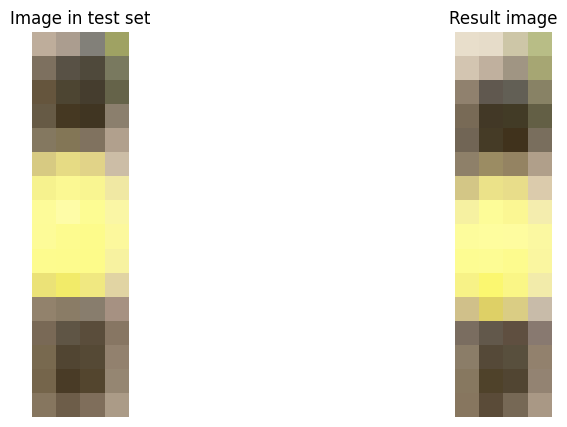

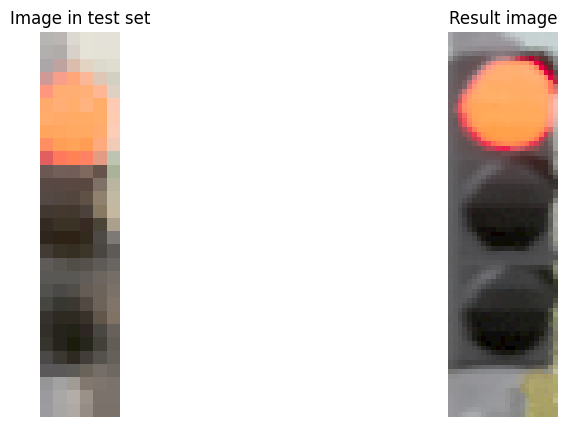

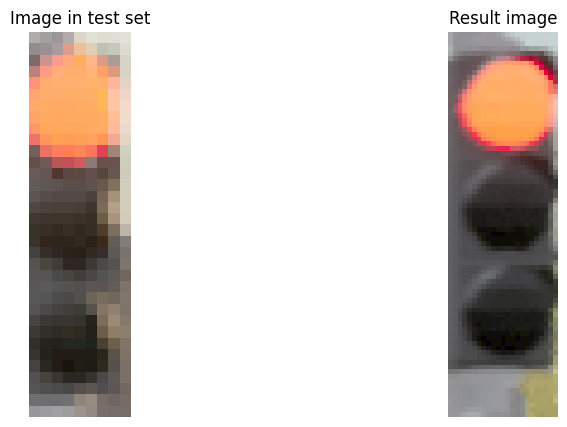

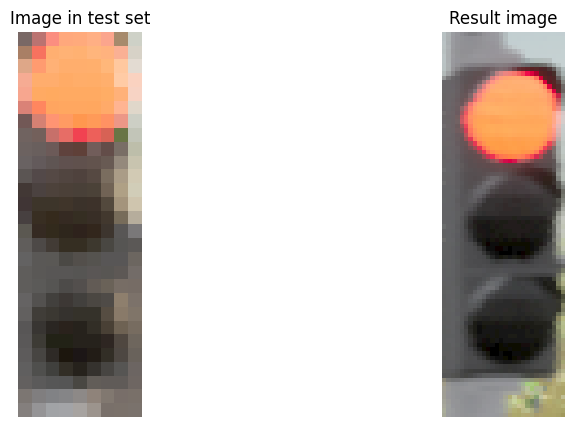

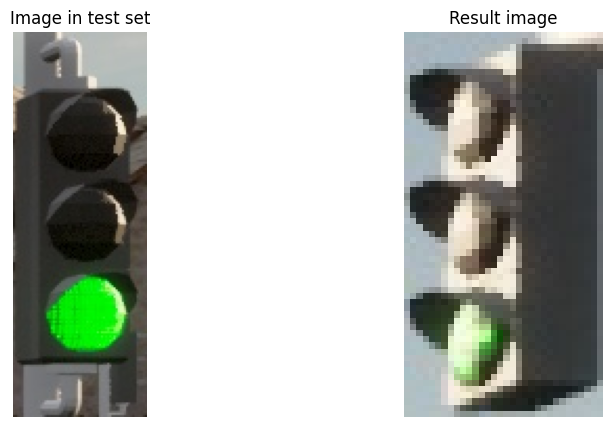

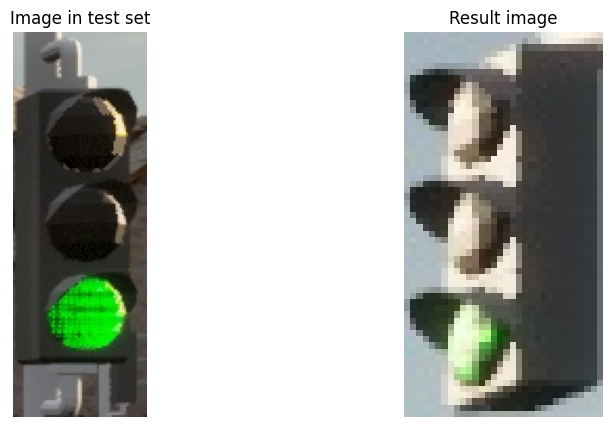

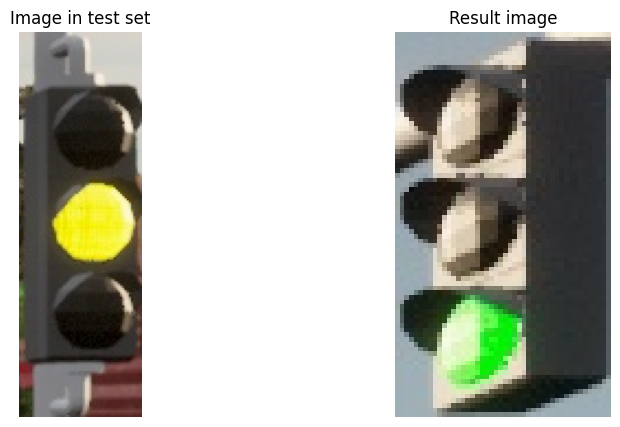

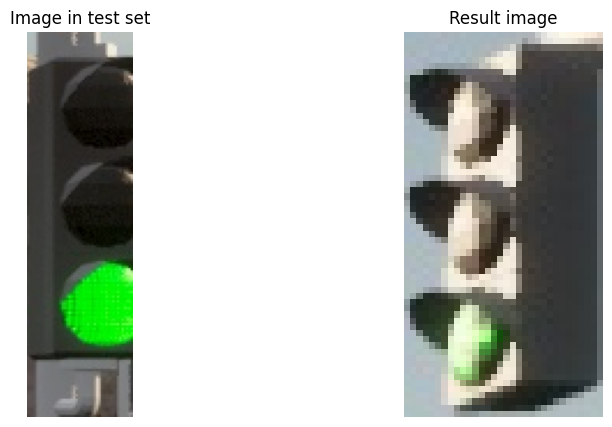

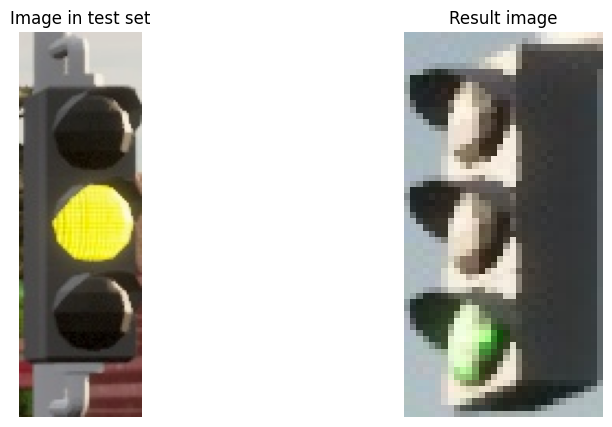

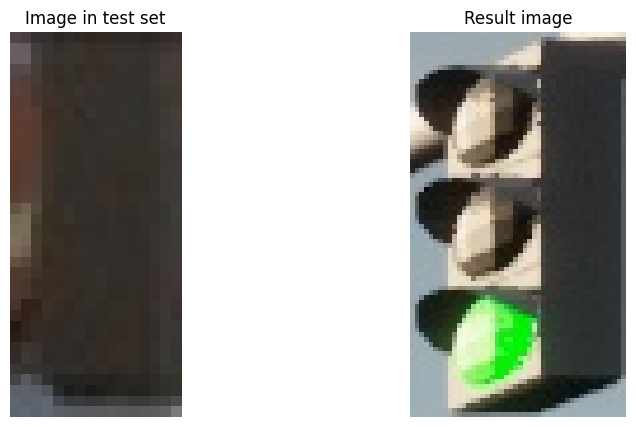

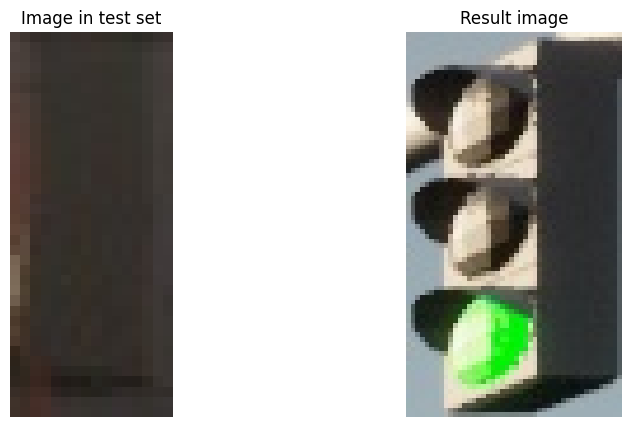

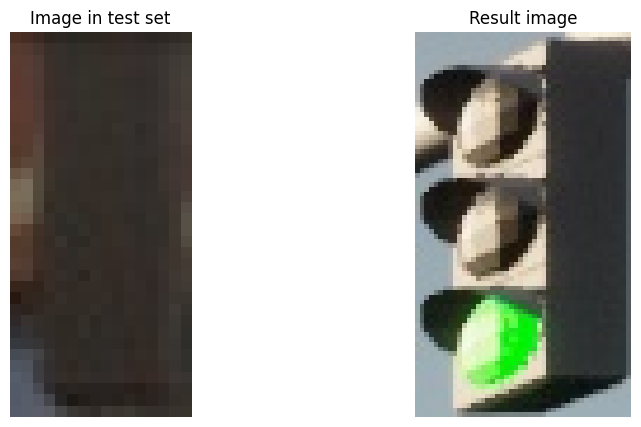

In [ ]:
for i in range(12):
  test_path = os.path.join(dir_test, ltest[i])
  result_path = os.path.join(dir_train, ltrain[min_indexes_Euclidean[i]])
  compareImages(test_path, result_path)


In [ ]:
D_cos_2 = distance.cdist(test_hist, train_hist, 'cosine')
min_indexes_Cosine = []
for each in D_cos_2:
  min_indexes_Cosine.append(np.argmin(each))

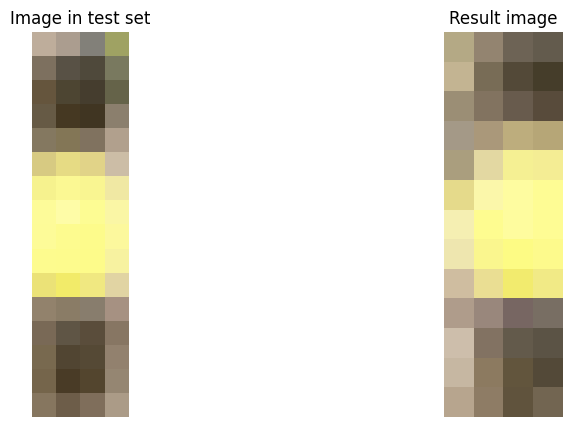

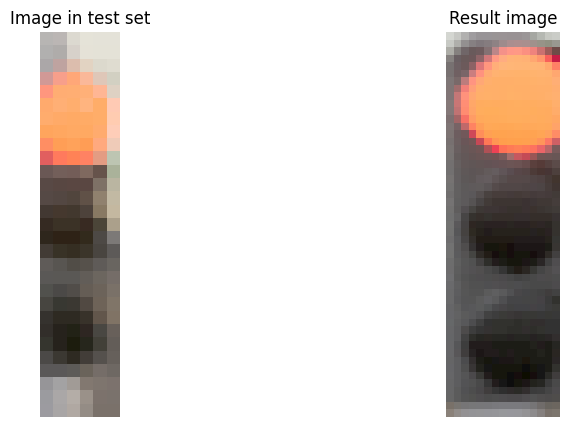

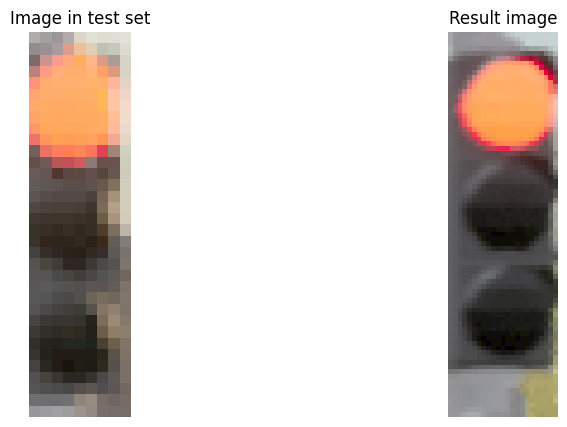

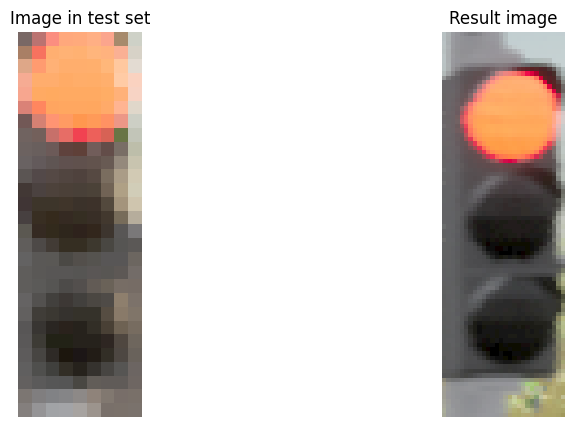

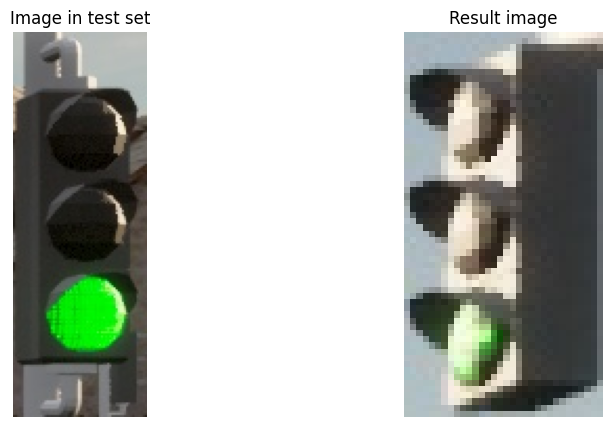

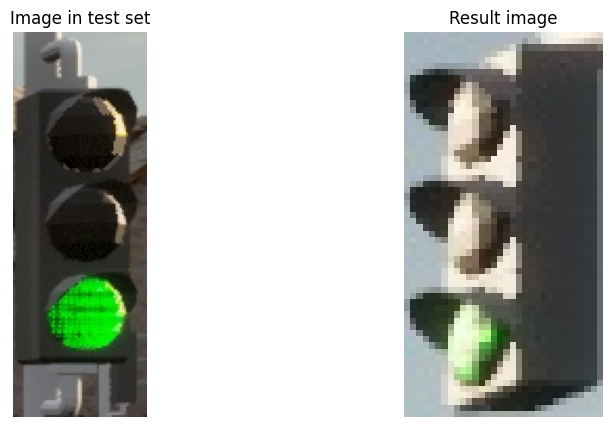

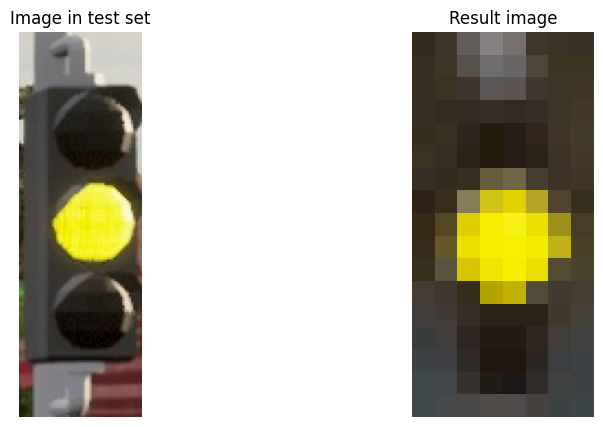

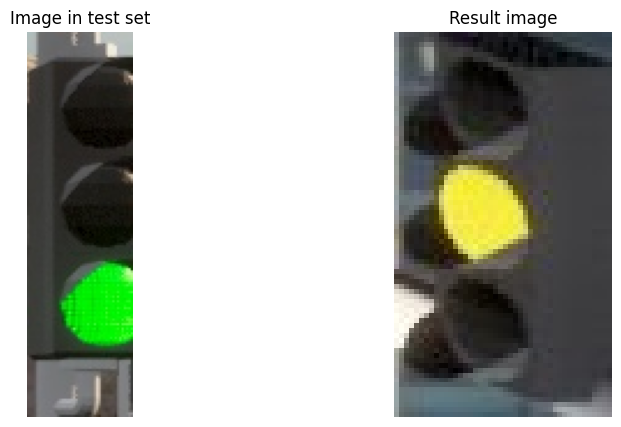

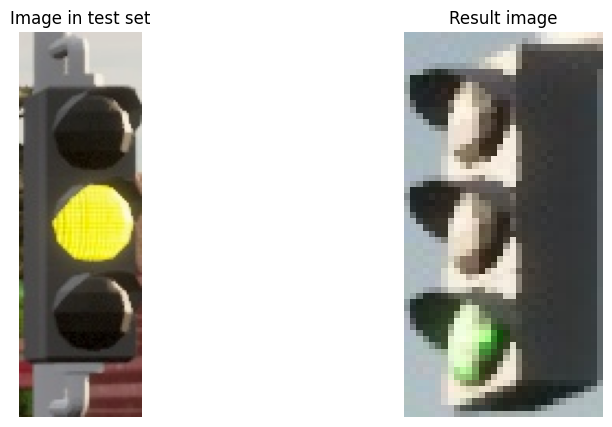

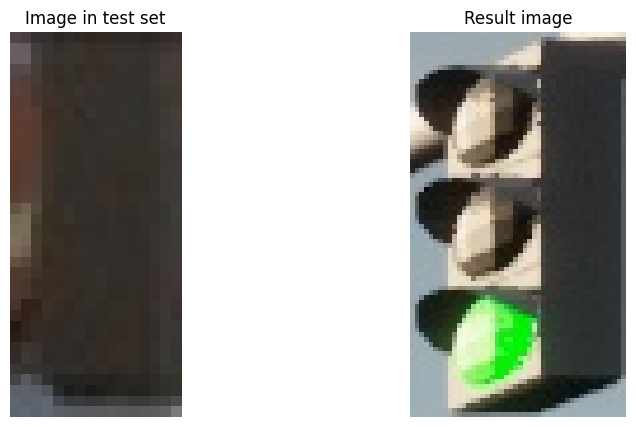

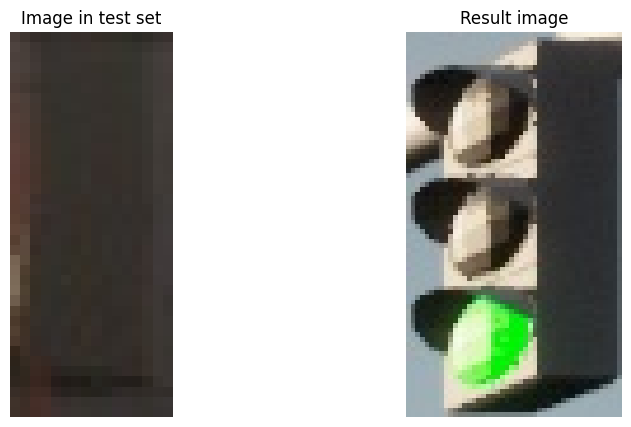

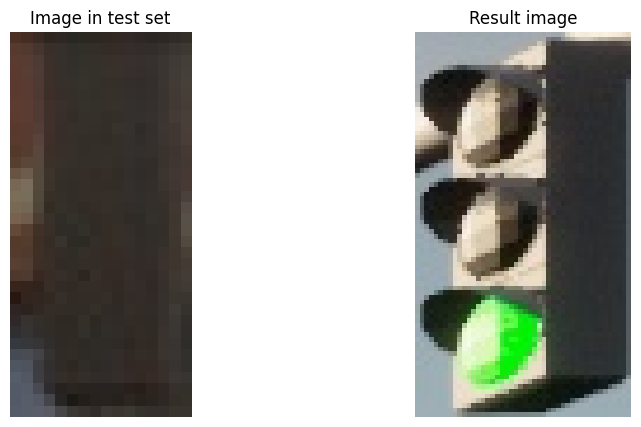

In [ ]:
for i in range(12):
  test_path = os.path.join(dir_test, ltest[i])
  result_path = os.path.join(dir_train, ltrain[min_indexes_Cosine[i]])
  compareImages(test_path, result_path)